In [1]:
# Notebook adapted from Jeremy P. Howard

In [45]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


In [31]:
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01

<p>Square error is square of difference between predicted and actual data values</p>
Define predicted: ${\hat y} $ and actual:${y}$ 
<p>Loss is:</p>
$({\hat y}-{y})^2$
<p>Previous definition y as linear_function</p>
${\hat y=\alpha + \beta x}$
<p>To minmize the Loss we take the derivative of the loss wrt alpha and beta, not x. x and y are datapoints
which is our dataset we are trying to fit to. The derivative of y is the sum of the partial derivatives of the dependent variables
which in this case are alpha and beta. </p>
<p></p>
$derivative(loss)=\cfrac{\partial(loss)}{\partial \alpha} + \cfrac{\partial(loss)}{\partial \beta}$
<p></p>
$\cfrac{\partial(loss)}{\partial \alpha}=\cfrac{(\hat y - y)^2}{\partial \alpha}=\cfrac{2*(\hat y-y)*\partial(\hat y - y)}{\partial \alpha}$
<p>Using:</p>
$\cfrac{\partial \hat y}{\partial \alpha}=1$ 
<p>and</p>
$\cfrac{\partial y}{\partial \alpha}=0$
<p>the derivative of loss wrt alpha for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \alpha}=2(\hat y-y)$
<p>The derivative of loss WRT beta starts as:</p>  
$\cfrac{\partial(loss)}{\partial \beta}=\cfrac{(\hat y - y)^2}{\partial \beta}=\cfrac{2*(\hat y-y)}{\partial \beta}*\cfrac{\partial(\hat y -y)}{\partial \beta}$
<p></p>
$\cfrac{\partial \hat y}{\partial \beta}=x$ and
$\cfrac{\partial y}{\partial \beta}=0$
<p>the derivative of loss wrt beta for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \beta}=2x*(\hat y-y)$


In [4]:
def update_alpha_and_beta():
    global alpha, beta
    y_predicted = linear_function(alpha,beta,x)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

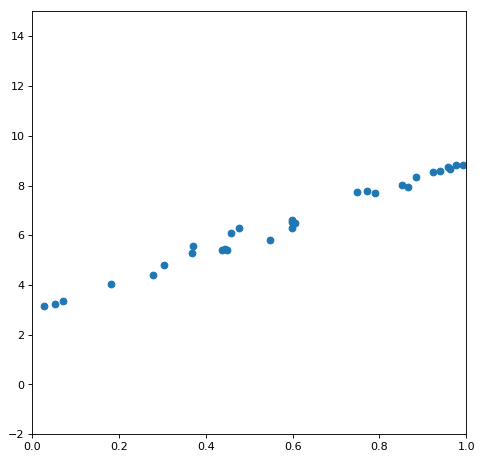

In [5]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [6]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [7]:
# Comment out (or delete) the following command, which shows the animation in Jupyter Notebook, 
# if you want the mp4 saved to disk to be correctly animated. 
# (Alternatively, you can reset the values of alpha and beta to their initial values 
# after this command.)

resulting_animation

In [8]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('linear_animation.mp4', writer=writer)

In [9]:
print('Done linear animation')

Done.


$y=\gamma x^2 + \beta x + \alpha$
<p></p>
$\cfrac{\partial(loss)}{\partial \gamma}=2x^2(\hat y-y)$
$\cfrac{\partial(loss)}{\partial \beta}=2x(\hat y -y)$
$\cfrac{\partial(loss)}{\partial \alpha}=2(\hat y-y)$


In [68]:
def square_function(gamma, beta, alpha,x):
    return gamma*x**2 + beta*x + alpha

In [69]:
#It doesnt make sense to use a quadratic to approximate a linear function,so change the dataset to 
#be quadratic

beta_true = 6.0
alpha_true = 3.0
gamma_true = 2.0

n = 30
x = random(n)
y = square_function(gamma_true,beta_true,alpha_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
gamma = 2.
learning_rate = 0.01

In [70]:
def update_squared():
    global gamma, alpha, beta
    y_predicted = square_function(gamma,beta,alpha,x)
    derivative_of_loss_wrt_gamma = 2*x**2*(y_predicted-y)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
    gamma = gamma - learning_rate * derivative_of_loss_wrt_gamma.mean()

def animate(i):
    x = np.linspace(0,1,100)
    y = square_function(gamma,beta,alpha,x)
    line.set_data(x,y)
    for i in range(20): 
        update_squared()
    return (line,)

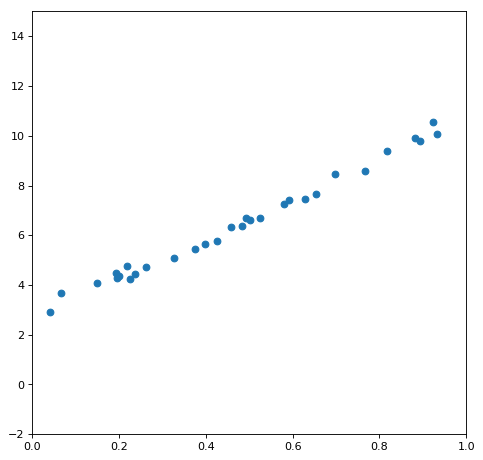

In [71]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [72]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [73]:
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('squared_animation.mp4', writer=writer)

In [ ]:
print('Done squared animation')

In [36]:
beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01

In [18]:
import random
print(len(x))
print(x)
print(y)
index = np.arange(0,30)
print(index)
r = np.random.choice(index,1,False)
print(r,x[r],y[r])
r = np.random.choice(index,1,False)
print(r,x[r],y[r])
r = np.random.choice(index,1,False)
print(r,x[r],y[r])



30
[0.99368989 0.6787249  0.12867421 0.17664916 0.21645638 0.69028858
 0.66275274 0.03071918 0.23459938 0.57878205 0.20213863 0.79693022
 0.82401898 0.40051496 0.04108123 0.12213784 0.63028522 0.86888451
 0.73686632 0.68133314 0.61648367 0.0534831  0.63214289 0.23426458
 0.93273636 0.07841368 0.61761822 0.42920949 0.41603962 0.34197768]
[9.24379954 6.79560436 3.78797201 3.88179171 4.64809258 7.38095921
 7.20243577 3.2371378  4.17231893 6.20827597 4.34949704 7.94693099
 7.69268455 5.80841299 3.52619454 3.95095838 6.85384709 8.38969677
 7.34134618 7.05215796 6.53849346 2.93905689 7.02009789 4.10082427
 8.48657205 3.3300503  6.72324998 5.41874914 5.49458141 4.98955027]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[14] [0.04108123] [3.52619454]
[0] [0.99368989] [9.24379954]
[7] [0.03071918] [3.2371378]


In [16]:
print(y)
q = np.random.choice(index,1,false)

<class 'numpy.ndarray'>
[9.24379954 6.79560436 3.78797201 3.88179171 4.64809258 7.38095921
 7.20243577 3.2371378  4.17231893 6.20827597 4.34949704 7.94693099
 7.69268455 5.80841299 3.52619454 3.95095838 6.85384709 8.38969677
 7.34134618 7.05215796 6.53849346 2.93905689 7.02009789 4.10082427
 8.48657205 3.3300503  6.72324998 5.41874914 5.49458141 4.98955027]


In [23]:
#SGD requires a batch size, 
def update_alpha_and_beta(y_predicted_batch,x_batch,y_batch):
    global alpha, beta
    y_predicted_batch = linear_function(alpha,beta,x_batch)
    derivative_of_loss_wrt_alpha = 2*(y_predicted_batch-y_batch)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
num_batch=5
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        index = np.arange(0,30)
        for it in range(num_batch):
            r = np.random.choice(index,1,False)
            y_batch,x_batch =y[r],x[r]
            y_predicted_batch = linear_function(alpha,beta,x_batch)
            update_alpha_and_beta(y_predicted_batch,x_batch,y_batch)
    return (line,)

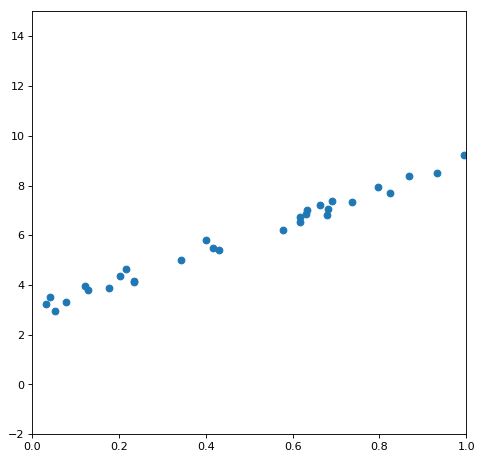

In [24]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [25]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [26]:
resulting_animation